# 1.0 Project Overview

## 1.1 Introduction

The research aims at  drawing insights from a combination of provided datasets to guide on a strategic decision to invest in movie industry. This research will, therefore adopt Cross Industry Standard Prcocedures- Data Mining(CRISP-DM) methodology for the movie industry.

# 2.0 Business Understanding

## 2.1 Objective


Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## 2.2 Empirical Summary

# 3.0 The Data

The data provided in a zippedData folder was extracted and presented in different formats(tsv, csv and database) from the following sources:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

## 3.1 Data Understanding

### Datasets Preview
Data preview before preparation, serves as familiarization with its features and be able to map out the essential features relevant to the scope of the problem statement. This invokes pertinent questions to draw insights from the data which gives confidence in data-driven decision making that guides business strategic direction.

*Import python libraries to enable reading, manipulation and visualization of data from the select datasets*

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os
import sqlite3
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

*Loading datasets*

In [3]:
#Loading datasets
bom_movie_gross = pd.read_csv('../data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv("../data/rt.movie_info.tsv", delimiter='\t')
rt_reviews = pd.read_csv('../data/rt.reviews.tsv', delimiter='\t', encoding='latin1')
tmdb_movie = pd.read_csv('../data/tmdb.movies.csv')
tn_movie_budget = pd.read_csv('../data/tn.movie_budgets.csv')

In [4]:
# Extract zipped db to im.db in the data folder
imdb ='../data/im.db.zip'
with ZipFile(imdb, 'r') as zip:
    zip.extractall('../data/')

#Extract to data folder
extracted_db = os.path.join('../data', 'im.db')

#Establish connection
conn = sqlite3.connect(extracted_db)

*Preview datasets*

1. bom_movie_gross

In [5]:
#bom_movie_gross
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#check file info
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**Observation:**
*The dataset has potentially essential columns for analysis; title,studio, revenues and year. However, foreign_gross dtype is object and requires conversion to correct dtype*
*Has 2 numeric and 3 object dtype columns*

2. rt_movie_info dataset

In [7]:
#rt_movie_info
rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [8]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


**Observation:**

*The dataset has potentially essential columns for analysis; rating, genre,director, writer, runtime,studio etc*
*Has 1 numeric and 11 categorical columns*

3. rt_reviews dataset

In [9]:
#rt_reviews
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


**Observation:**
*The dataset has potentially essential columns for analysis; review,rating, genre,publisher,date*
*Has 2 numeric and 6 categorical columns*
*This dataset may be merged with rt_movie_info to draw more insights*


4. tmdb_movie dataset

In [11]:
#tmdb_movie
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


**Observation:**

*The dataset has potentially essential columns for analysis; popularity,release_date, title, vote_average/vote count*
*Has 5 numeric and 5 categorical columns*
*This dataset may be merged with rt_reviews to draw more insights*

5. tn_movie_budget dataset

In [13]:
# tn_movie_budget
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Observation:**

*The dataset has essential columns for analysis; release_date, movie, production_gross,domestic_gross, worldwide_gross*
*This dataset may be merged with other datasets to draw more insights and perform feature engineering appropriately.*

6. IMdb zipped database

In [15]:
#Preview columns for each table in the database
# List of tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

# Loop through each table, and print out the column names
for table in tables['name']:
    print(f"Columns in '{table}':")
    
    # Column names for the current table
    columns_df = pd.read_sql(f"PRAGMA table_info({table});", conn)
    
    # Print the column names 
    col_names = columns_df['name'].tolist()  # 'name' column contains column names
    print(col_names)
    print() # add space

Columns in 'movie_basics':
['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

Columns in 'directors':
['movie_id', 'person_id']

Columns in 'known_for':
['person_id', 'movie_id']

Columns in 'movie_akas':
['movie_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']

Columns in 'movie_ratings':
['movie_id', 'averagerating', 'numvotes']

Columns in 'persons':
['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession']

Columns in 'principals':
['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters']

Columns in 'writers':
['movie_id', 'person_id']



In [16]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [17]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


## 3.2 Redefining Problem Statement

Our company is entering the highly competitive and dynamic film industry with the goal of establishing a successful movie studio. The challenge is to establish suitable strateg(ies) to identify and create films sustainably. We must understand current market trends, identify emerging opportunities, and develop an effective portfolio strategy that balances risk and reward while positioning our studio for both short-term success and long-term sustainability.

**General Objective:**  To identify suitable type(s) of films to create.

**Specific Objectives:**
1. To identify trends on various genres, styles and themes

2. To determine the most profitable film categories

3. To examine consumer film preferences(consumption trends; reviews and ratings)

4. To establish existing relationship(linear regression analysis)

**Scope**
The scope of this research is limited to select datasets to draw insights, conclusions and recommendations.

**Assumptions**
* The specific objectives will be met by analysis of data from *im.db.zip, tn_movie_budget and tmdb_movie* data files.

# 3.3 Metrics of Success

This research will be deemed successful if, from data manipulation be able to draw insights on;
* The trends on various genres,
* Identify and recommend the most popular genres for the new studio to choose from,
* Recommend on the most profitable genres to invest in,


# 4.0 Data Preparation

## 4.1 Data Cleaning
This phase involves checking on data validity, accuracy, completeness, accuracy, consistency and uniformity. These will be carried out on the select datasets that are within the scope of reasearch.

In [18]:
#Merge movie_basics and movie_ratings
merged_basic_rating = pd.merge(movie_basics,movie_ratings, on='movie_id', how='left')

In [19]:
# tn_movie_budget
tn_movie_budget = tn_movie_budget.dropna()

In [20]:
#Rename movie column to title
tn_movie_budget.rename(columns={'movie':'title'}, inplace=True)

In [21]:
tn_movie_budget.head(3)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [22]:
# tmdb_movie
tmdb_movie = tmdb_movie.drop('Unnamed: 0',axis=1)

In [23]:
tmdb_movie.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [24]:
#Merge tmbd_movie to tn_movie_budget
movie_df = tn_movie_budget.merge(tmdb_movie, on='title', how='inner').reset_index()
movie_df.head(3)

,index,id_x,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457


### 4.1.1 Validity check

This achieved by checking irrelevant features and removing them or selecting the revelant features 

In [25]:
#Perform validity check on select data files
#1.Merged_basic_rating
merged_basic_rating.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0


In [26]:
# movie_df
movie_df.head(3)

,index,id_x,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457


In [27]:
# dropping irrelevant columns in movie_df
select_cols = ['id_x','release_date_y','id_y' ]
movie_df = movie_df.drop(columns = select_cols,axis=1)



In [28]:
movie_df.head(3)

,index,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,vote_average,vote_count
0,0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",en,Avatar,26.526,7.4,18676
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571
2,2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",en,Avengers: Age of Ultron,44.383,7.3,13457


### 4.1.2 Data completeness

Checking for missing values and treating them. Missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed.

In [29]:
# Check for missing values
#1. merged_basic_rating
merged_basic_rating.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [30]:
#drop missing values
merged_basic_rating = merged_basic_rating.dropna()

In [31]:
#confirm missing values dropped
merged_basic_rating.isna().any().sum()

0

In [32]:
# check for missing values for movie_df udget data file
movie_df.isna().sum()

index                0
release_date_x       0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
genre_ids            0
original_language    0
original_title       0
popularity           0
vote_average         0
vote_count           0
dtype: int64

In [33]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2385 non-null   int64  
 1   release_date_x     2385 non-null   object 
 2   title              2385 non-null   object 
 3   production_budget  2385 non-null   object 
 4   domestic_gross     2385 non-null   object 
 5   worldwide_gross    2385 non-null   object 
 6   genre_ids          2385 non-null   object 
 7   original_language  2385 non-null   object 
 8   original_title     2385 non-null   object 
 9   popularity         2385 non-null   float64
 10  vote_average       2385 non-null   float64
 11  vote_count         2385 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 223.7+ KB


### 4.1.3 Data accuracy

Checking for outlier values in the data that distorts its accuracy. This is mitigated by drop/removing outliers

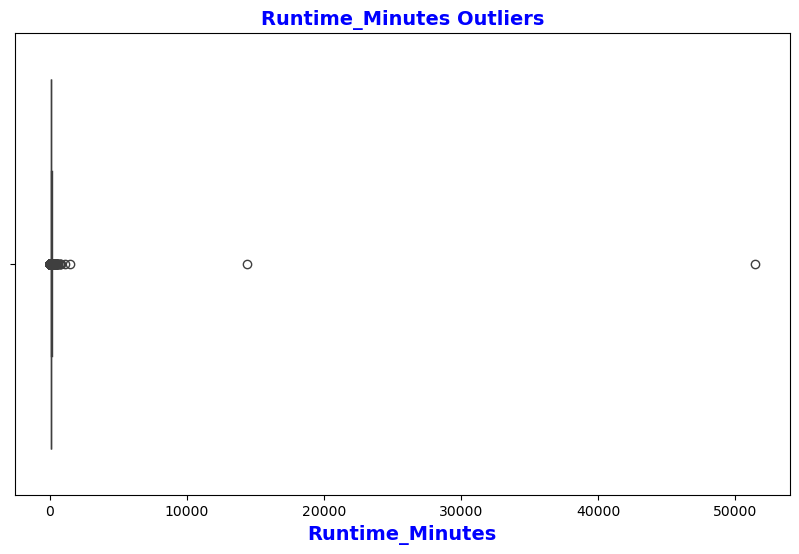

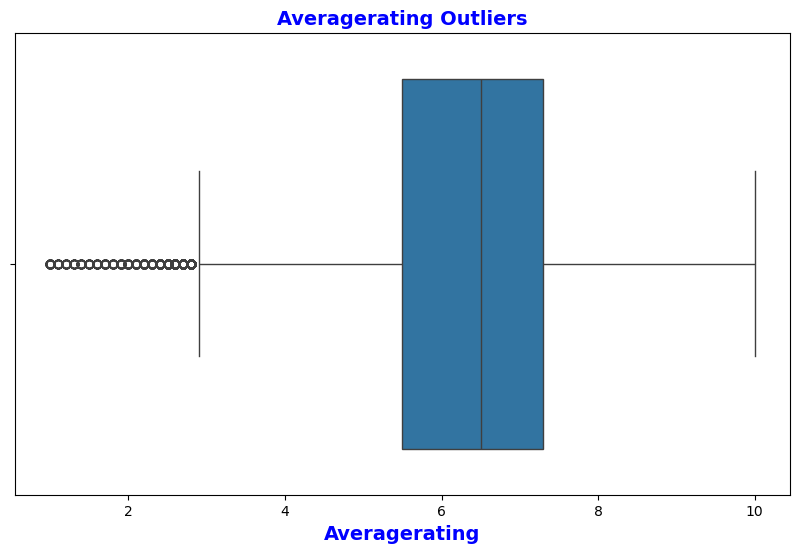

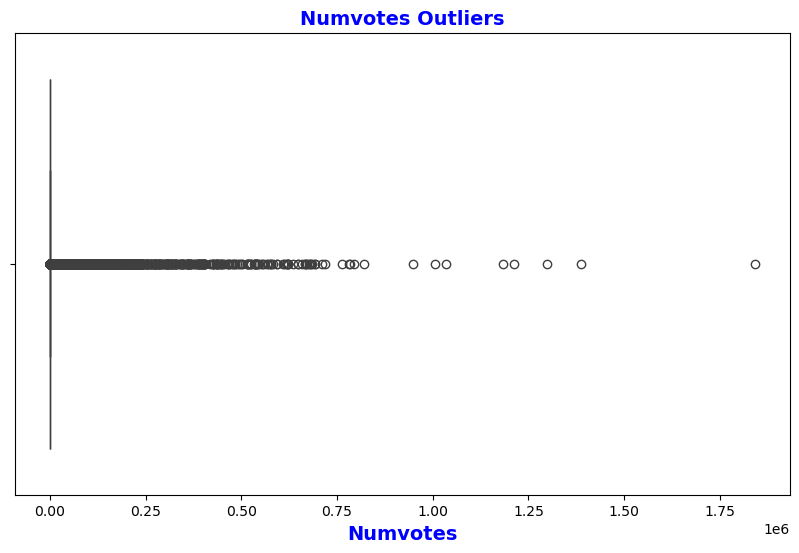

In [34]:
# Check for ouliers in merged_basic_rating
float_features = merged_basic_rating.select_dtypes(include='float').columns
for feature in float_features:
    plt.figure(figsize= (10,6))
    sns.boxplot(x=merged_basic_rating[feature])

    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    plt.show();

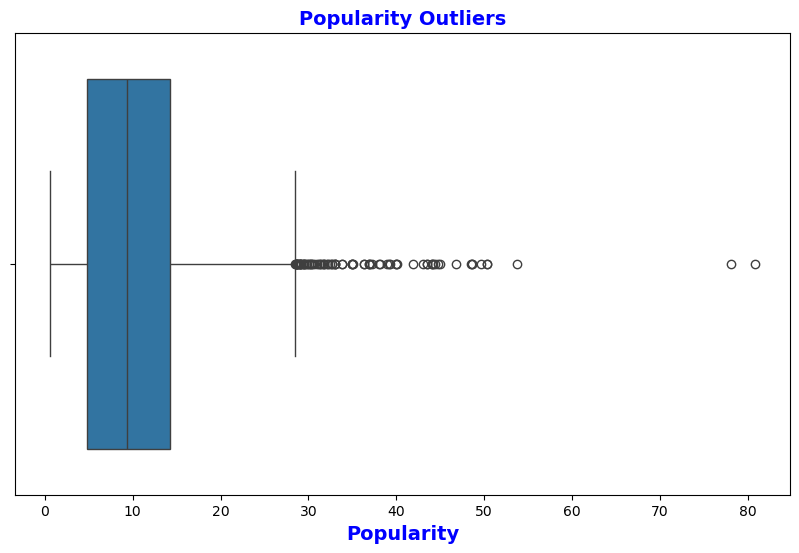

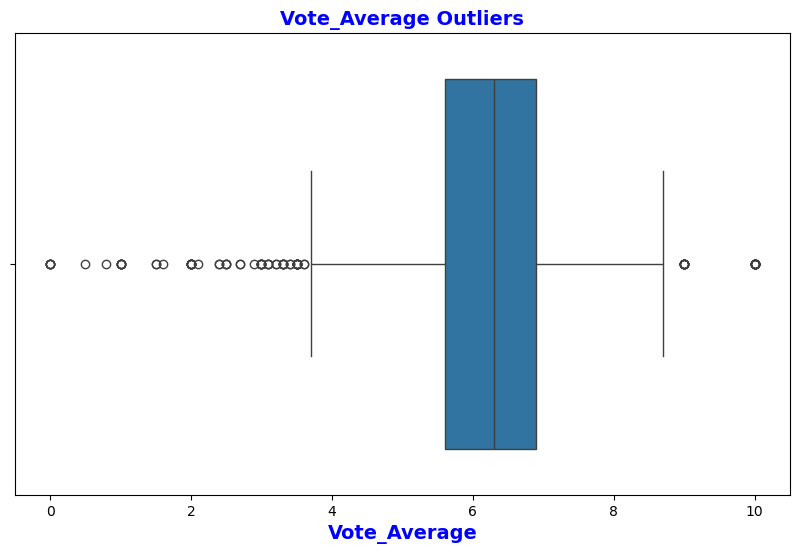

In [35]:
# Check for ouliers in merged_basic_rating
float_features = movie_df.select_dtypes(include='float').columns
for feature in float_features:
    plt.figure(figsize= (10,6))
    sns.boxplot(x=movie_df[feature])

    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    plt.show();

### 4.1.4 Data consistency

Consistency is achieved through removal of duplicates in the dataframe

In [36]:
#Check for duplicates
merged_basic_rating.duplicated().sum()

0

In [37]:
#tn_movie_budget
movie_df.duplicated().sum()

0

### 4.1.5 Data Uniformity

Involves feature engineering

In [38]:
#Feature engineering
#Rename movie as title in tn_movie_budget
tn_movie_budget.rename(columns={'movie':'title'}, inplace=True)

In [39]:
movie_df.head(3)

,index,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,vote_average,vote_count
0,0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","[28, 12, 14, 878]",en,Avatar,26.526,7.4,18676
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571
2,2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[28, 12, 878]",en,Avengers: Age of Ultron,44.383,7.3,13457


In [40]:
# Function to clean and convert select columns
def clean_and_convert_cols(df,cols):
    #Roop through each column
    for col in cols:
        if col in df.columns:
            # Remove leading '$' and trim whitespaces
            df[col] = df[col].str.replace(r'[$,]','', regex=True)
            df[col] = df[col].str.strip()
            # Convert to numeric
            df[col] = pd.to_numeric(df[col])
    return df

In [41]:
#columns to clean and convert
columns_selected = ['production_budget','domestic_gross','worldwide_gross']
movie_df = clean_and_convert_cols(movie_df,columns_selected)

In [42]:
movie_df.head()

,index,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,vote_average,vote_count
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,Avatar,26.526,7.4,18676
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571
2,2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,7.3,13457
3,3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",en,Avengers: Infinity War,80.773,8.3,13948
4,4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",en,Justice League,34.953,6.2,7510


In [43]:
#mapping genre ids to names
import ast

genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western",
    # TV Show-specific genres
    10759: "Action & Adventure",
    10762: "Kids",
    10763: "News",
    10764: "Reality",
    10765: "Sci-Fi & Fantasy",
    10766: "Soap",
    10767: "Talk",
    10768: "War & Politics"
}

# Function to convert a list of genre IDs to genre names
def ids_to_names(genre_ids_str):
    # Convert the string representation of a list to an actual list of integers
    genre_ids = ast.literal_eval(genre_ids_str)
    # Map each genre ID to its name using the genre_map dictionary
    return [genre_map[genre_id] for genre_id in genre_ids if genre_id in genre_map]

# Apply the function to the 'genre_ids' column
movie_df['genre_names'] = movie_df['genre_ids'].apply(ids_to_names)

movie_df.head(3)

,index,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,vote_average,vote_count,genre_names
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,Avatar,26.526,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571,"[Adventure, Action, Fantasy]"
2,2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,7.3,13457,"[Action, Adventure, Science Fiction]"


In [44]:
#Feature engineering
#Engineer profits and ROI features
movie_df['profit'] = movie_df['worldwide_gross'] - movie_df['production_budget']
movie_df['ROI'] = (movie_df['profit'] / movie_df['production_budget']) * 100

In [45]:
movie_df.head()

,index,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,vote_average,vote_count,genre_names,profit,ROI
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,Avatar,26.526,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]",2351345279,553.257713
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571,"[Adventure, Action, Fantasy]",635063875,154.667286
2,2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,7.3,13457,"[Action, Adventure, Science Fiction]",1072413963,324.384139
3,3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",en,Avengers: Infinity War,80.773,8.3,13948,"[Adventure, Action, Fantasy]",1748134200,582.711400
4,4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",en,Justice League,34.953,6.2,7510,"[Action, Adventure, Fantasy, Science Fiction]",355945209,118.648403


### 4.1.6 Cleaned Datasets

In [46]:
# Extract clean datafile from im.db
clean_merged_basic_rating = merged_basic_rating

In [47]:
#Merged and clean data file from csv files(tmdb.movies, tn.movie_budgets)
clean_movie_df = movie_df

# 5.0 Exploratory Data Analysis(EDA)

This is the process of analyzing data to reveal trends and patterns, detect anomalies, test hypotheses and check assumptions using visuals and summary statistics.Turkey,J.W(1977)

Key goals of EDA include:

Understanding the data: Getting a sense of the data's distribution, range, and central tendencies.
Identifying patterns: Discovering trends, correlations, or anomalies within the data.
Checking assumptions: Verifying assumptions made about the data before further analysis or modeling.
Generating hypotheses: Developing potential explanations or questions based on the findings.

In [48]:
# clean_merged_basic_rating and ....datasets
clean_merged_basic_rating.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0


In [49]:
clean_movie_df.head(3)

,index,release_date_x,title,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,original_title,popularity,vote_average,vote_count,genre_names,profit,ROI
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,Avatar,26.526,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]",2351345279,553.257713
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571,"[Adventure, Action, Fantasy]",635063875,154.667286
2,2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,7.3,13457,"[Action, Adventure, Science Fiction]",1072413963,324.384139


## 5.1 Univariate Analysis

Univariate analysis examination of single variable distribution and measures of central tendency. Objective of this analysis is to identify patterns, trends, and outliers.

Count plots,bar charts, and pie charts are used to visually represent categorical data, while histogram and boxplots are used to visualize numerical data.

In [50]:
#1.counts of genres 
genre_counts = clean_merged_basic_rating['genres'].value_counts().sort_values(ascending=False)
genre_counts

genres
Drama                        10189
Documentary                   9149
Comedy                        4604
Comedy,Drama                  2451
Horror                        2232
                             ...  
Animation,Family,Sci-Fi          1
Adventure,Music,Romance          1
Adventure,Family,Music           1
Family,Mystery,Sport             1
Documentary,Family,Sci-Fi        1
Name: count, Length: 906, dtype: int64

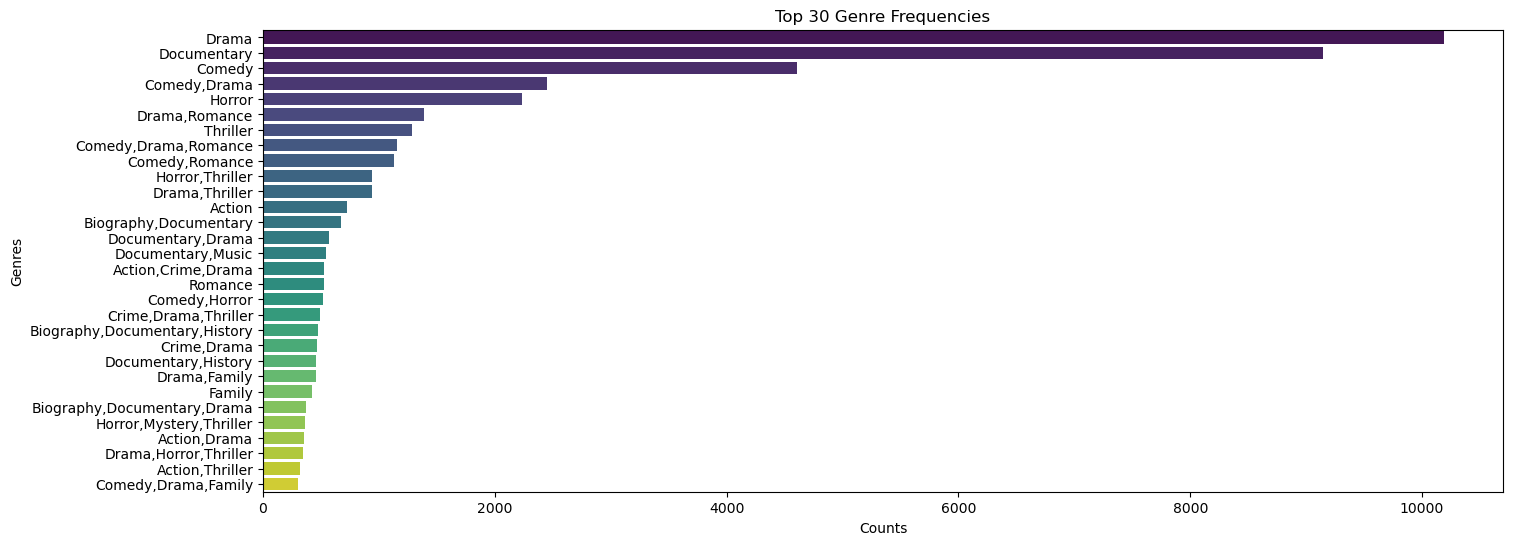

In [51]:
# Count plot for top 30 genres
top_30_genres = genre_counts.head(30)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_30_genres.values, y=top_30_genres.index, palette="viridis")
plt.title('Top 30 Genre Frequencies')
plt.xlabel('Counts')
plt.ylabel('Genres')
plt.show()

**Observation**

Drama, Documentary and Comedy have higher frequencies than other genres and their combinations

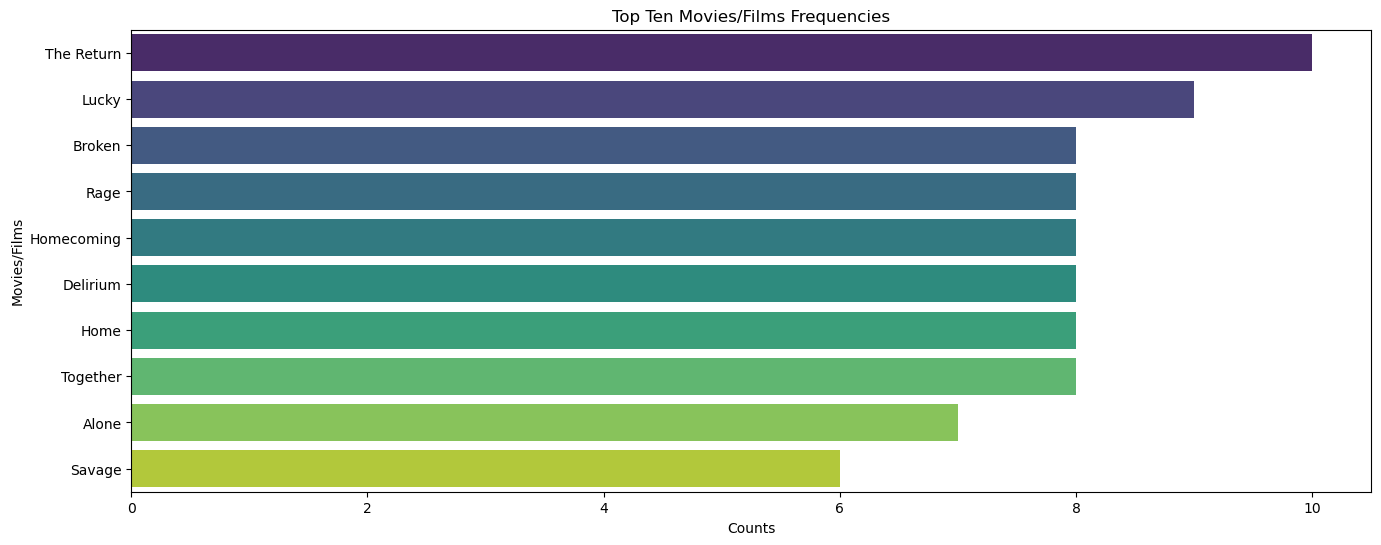

In [52]:
# plot of top ten movies/films
top_ten_movies = clean_merged_basic_rating['primary_title'].value_counts().head(10)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_ten_movies.values, y=top_ten_movies.index, palette='viridis')
plt.title('Top Ten Movies/Films Frequencies')
plt.xlabel('Counts')
plt.ylabel('Movies/Films');

**Observatio**

Analysis of movies/films shows *The Return, Lucky, Broken* are the top movies/films by count with *The Return* having the highest count

In [53]:
# Histogram for profits and production budgets
def hist_plots(df, profit_col='profit', production_budget_col='production_budget'):
    
    # Set up the plotting area with 1 row and 2 columns for the histograms
    plt.figure(figsize=(14, 6))

    # Plot Profit Histogram
    plt.subplot(1, 2, 1)  # First subplot
    sns.histplot(df[profit_col], kde=True, color='blue', bins=20)  # include kde
    plt.title(f'Histogram of {profit_col}',size= 14, weight='bold', color = 'blue')
    plt.xlabel('Profit',size= 12, weight='bold')
    plt.ylabel('Frequency',size= 12, weight='bold')

    # Plot ROI Histogram
    plt.subplot(1, 2, 2)  # Second subplot
    sns.histplot(df[production_budget_col], kde=True, color='green', bins=20)  # include kde
    plt.title(f'Histogram of {production_budget_col}', size= 14, weight='bold', color = 'blue')
    plt.xlabel('Production Budget',size= 12, weight='bold')
    plt.ylabel('Frequency',size= 12, weight='bold')

    # Show the plots
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


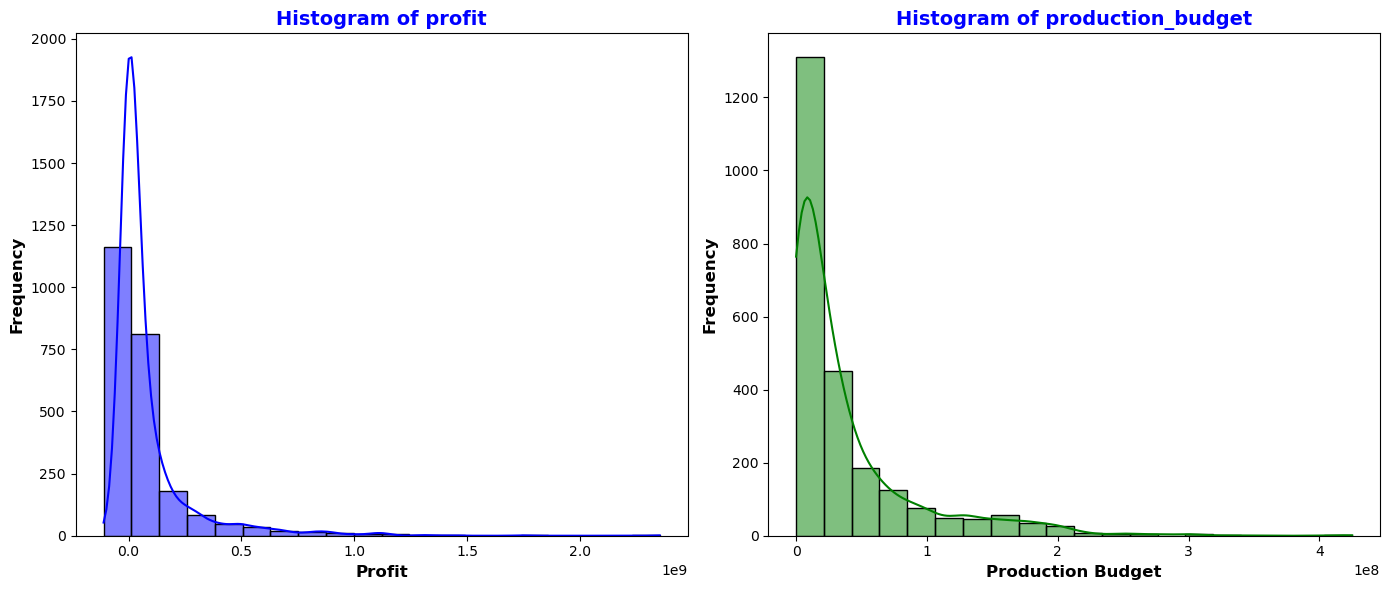

In [54]:
hist_plots(clean_movie_df)

### Observations

Histogram plots for production budget and profits shows that more movies run lower budgets and more movies lead to low profits.

## 5.2 Bivariate Analysis

This is the analysis of data to identify patterns, trends, and correlations of two variables in a given dataset. This can be achieved by use of bar plots, scatter plots, correlation coefficient and regression analysis

In [55]:
# Group by 'genres' and calculate the average rating
avg_rating_per_genre = clean_merged_basic_rating.groupby('genres')['averagerating'].mean().reset_index()

# Sort the results by average rating in descending order
avg_rating_per_genre = avg_rating_per_genre.sort_values(by='averagerating', ascending=False)

# Check the result
avg_rating_per_genre.head()

,genres,averagerating
442,"Comedy,Documentary,Fantasy",9.4
622,"Documentary,Family,Musical",9.3
824,Game-Show,9.0
763,"Drama,Short",8.8
670,"Documentary,News,Sport",8.8


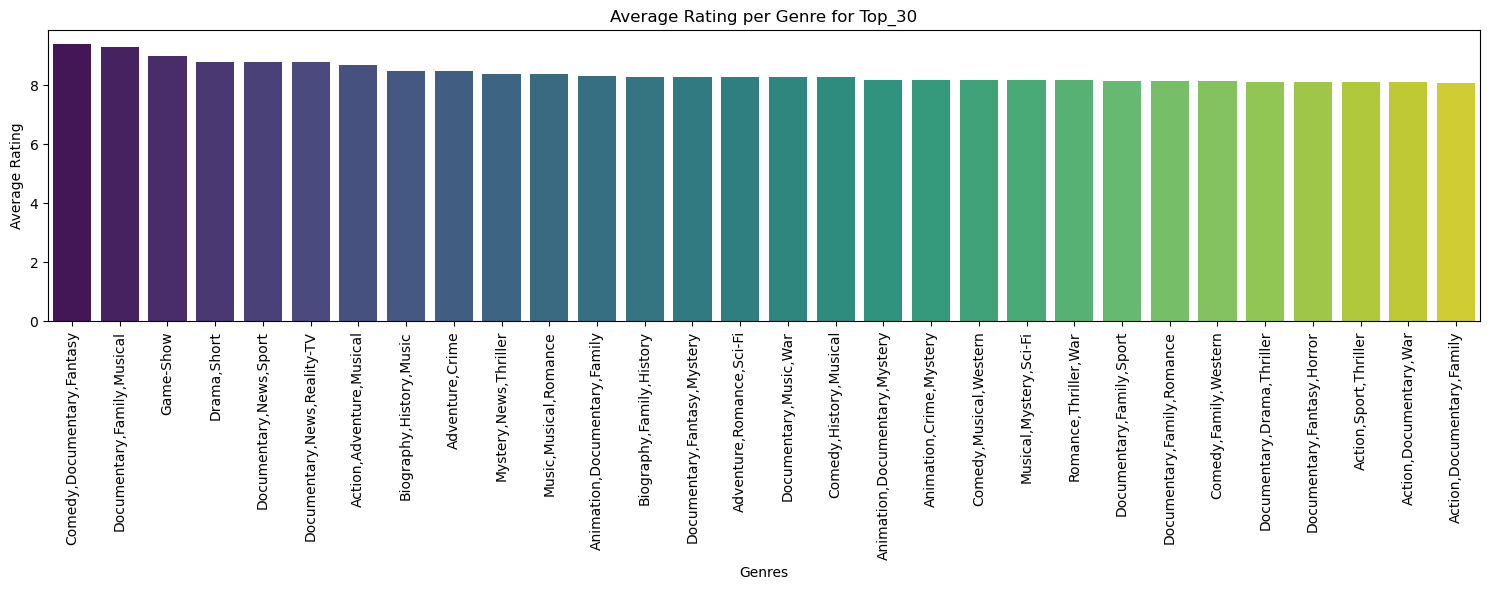

In [56]:
# Plot for average rating per genre for top 30

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_rating_per_genre.head(30), x='genres', y='averagerating', palette='viridis')

# Rotate the genre labels for better readability
plt.xticks(rotation=90)

# Customize plot
plt.title('Average Rating per Genre for Top_30')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.tight_layout();

In [57]:
# Analysis of vote average per movie title
avg_profit_per_movie = clean_movie_df.groupby('title')['profit'].mean().sort_values(ascending=False).head(20)
avg_profit_per_movie.head()

title
Avatar                    2.351345e+09
Avengers: Infinity War    1.748134e+09
Jurassic World            1.433855e+09
Furious 7                 1.328723e+09
Black Panther             1.148258e+09
Name: profit, dtype: float64

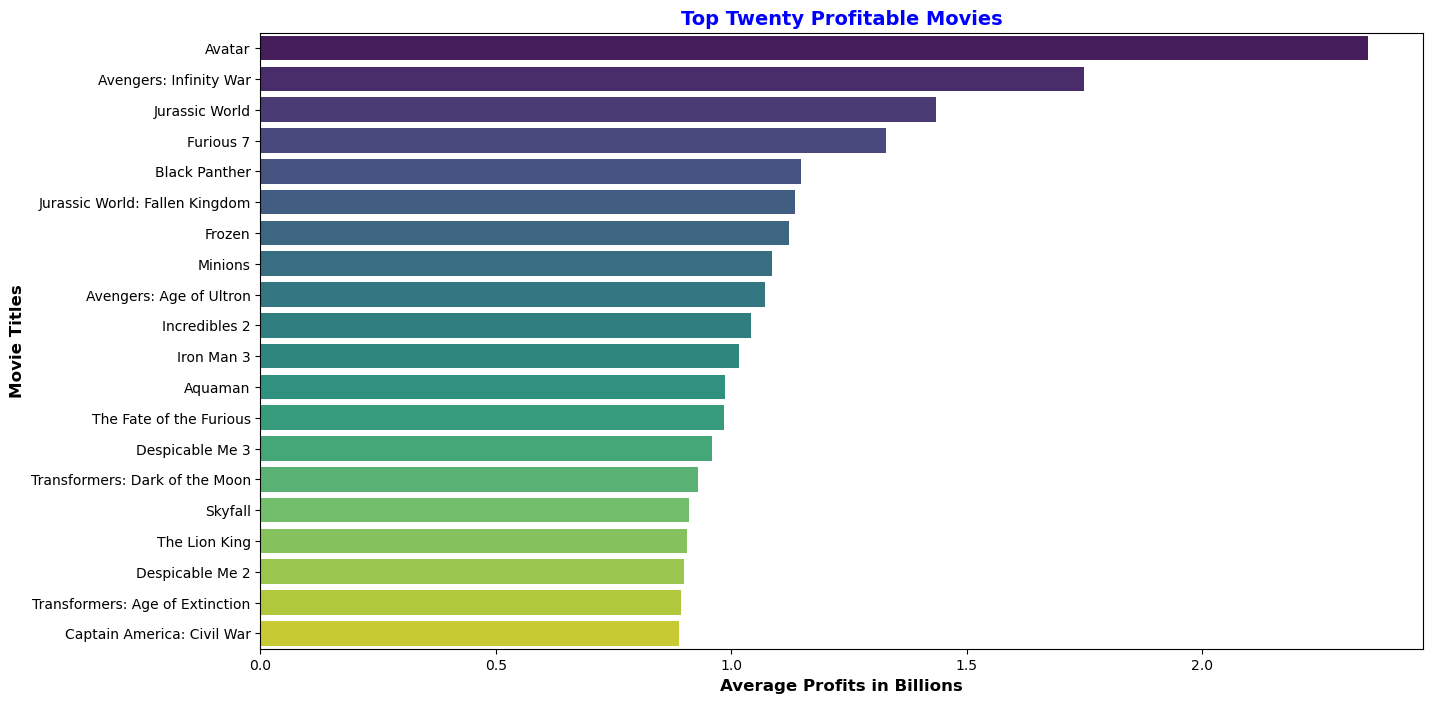

In [58]:
#visuals
plt.figure(figsize=(15, 8))

sns.barplot(x=(avg_profit_per_movie.values/1e9), y=avg_profit_per_movie.index, palette='viridis')
plt.title('Top Twenty Profitable Movies',size= 14, weight='bold', color = 'blue')
plt.ylabel('Movie Titles',size= 12, weight='bold')
plt.xlabel('Average Profits in Billions',size= 12, weight='bold')
plt.show()

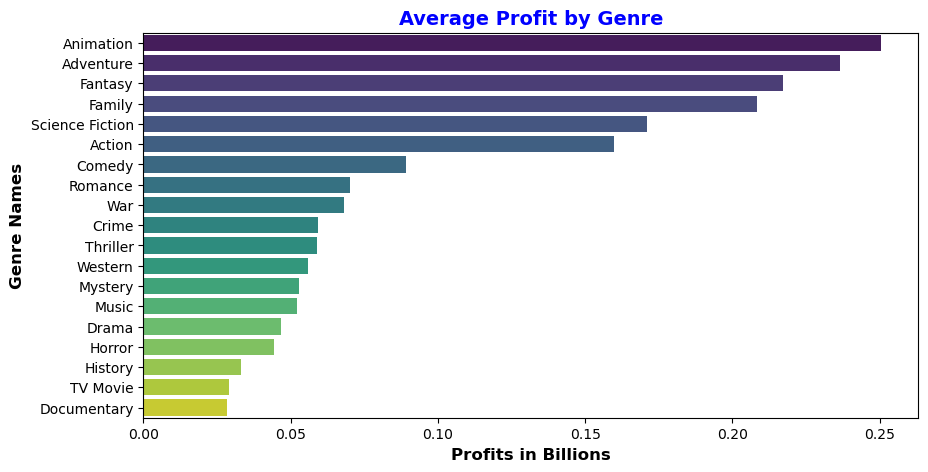

In [65]:
# Profitability by genres
explode_data = clean_movie_df.explode('genre_names')

profit_genre = explode_data.groupby(['genre_names']).agg({"profit":"mean"}).reset_index().sort_values(by='profit',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=profit_genre['profit']/1e9, y='genre_names', data=profit_genre, palette='viridis')
plt.title("Average Profit by Genre", size=14, weight='bold',color='blue')
plt.ylabel("Genre Names", size=12, weight='bold')
plt.xlabel("Profits in Billions", size=12, weight='bold')
plt.show()


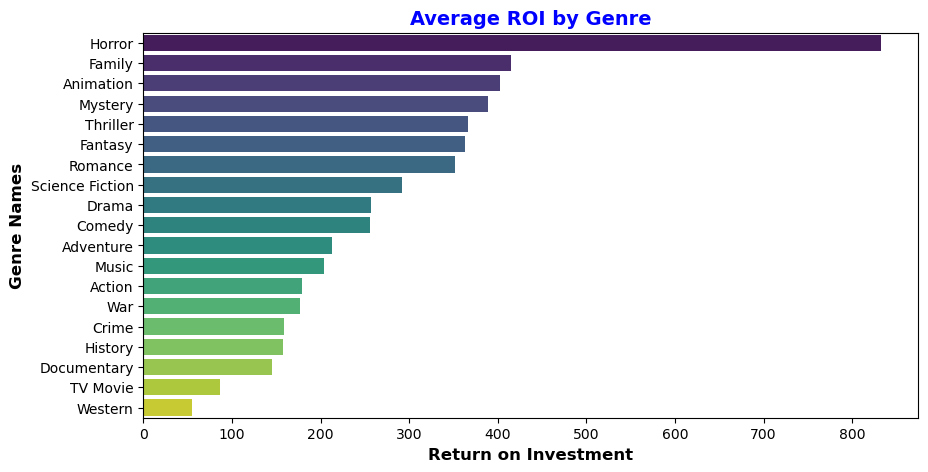

In [68]:
ROI_genre = explode_data.groupby(['genre_names']).agg({"ROI":"mean"}).reset_index().sort_values(by='ROI',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='ROI', y='genre_names', data=ROI_genre, palette='viridis')
plt.title("Average ROI by Genre", size=14, weight='bold',color='blue')
plt.ylabel("Genre Names", size=12, weight='bold')
plt.xlabel("Return on Investment", size=12, weight='bold')
plt.show()

### Observations:

## 5.3 Multivariate Analayis

Multivariate analysis is a statistical technique used to describe and summarize patterns, trends, and correlations between three or more variables. It is achieved by deployement of various analysis techniques such as ;

** *Multiple regression analysis*

** *Factor analysis*

** *Cluster analysis*

** *Discriminant analysis*

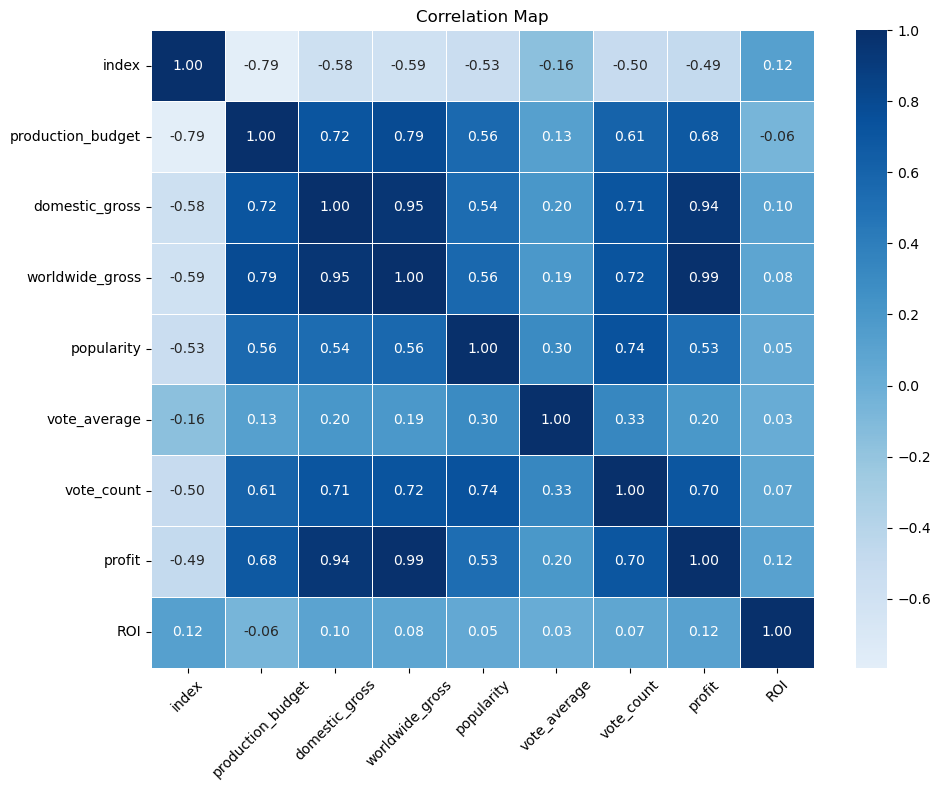

In [69]:
def plot_corr_heatmap(df, cols=None, figsize=(10, 8)):
  
    # If columns is not provided, use all numeric columns in the DataFrame
    if cols is None:
        cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Calculate the correlation matrix for the specified columns
    correlation_matrix = df[cols].corr()
    
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar=True, center=0)
    
    # Title and labels
    plt.title('Correlation Map')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.yticks(rotation=0)   # Keep y-axis labels horizontal
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
#plot_corr_heatmap(final_df)  # Plot the correlation map for all columns
plot_corr_heatmap(clean_movie_df)

### Observations:

# 6.0 Modeling



Predictive Modeling erfers to the process of building a mathematical representation that can learn trends from data to make predictions  (regression, classification, clustering, etc.).





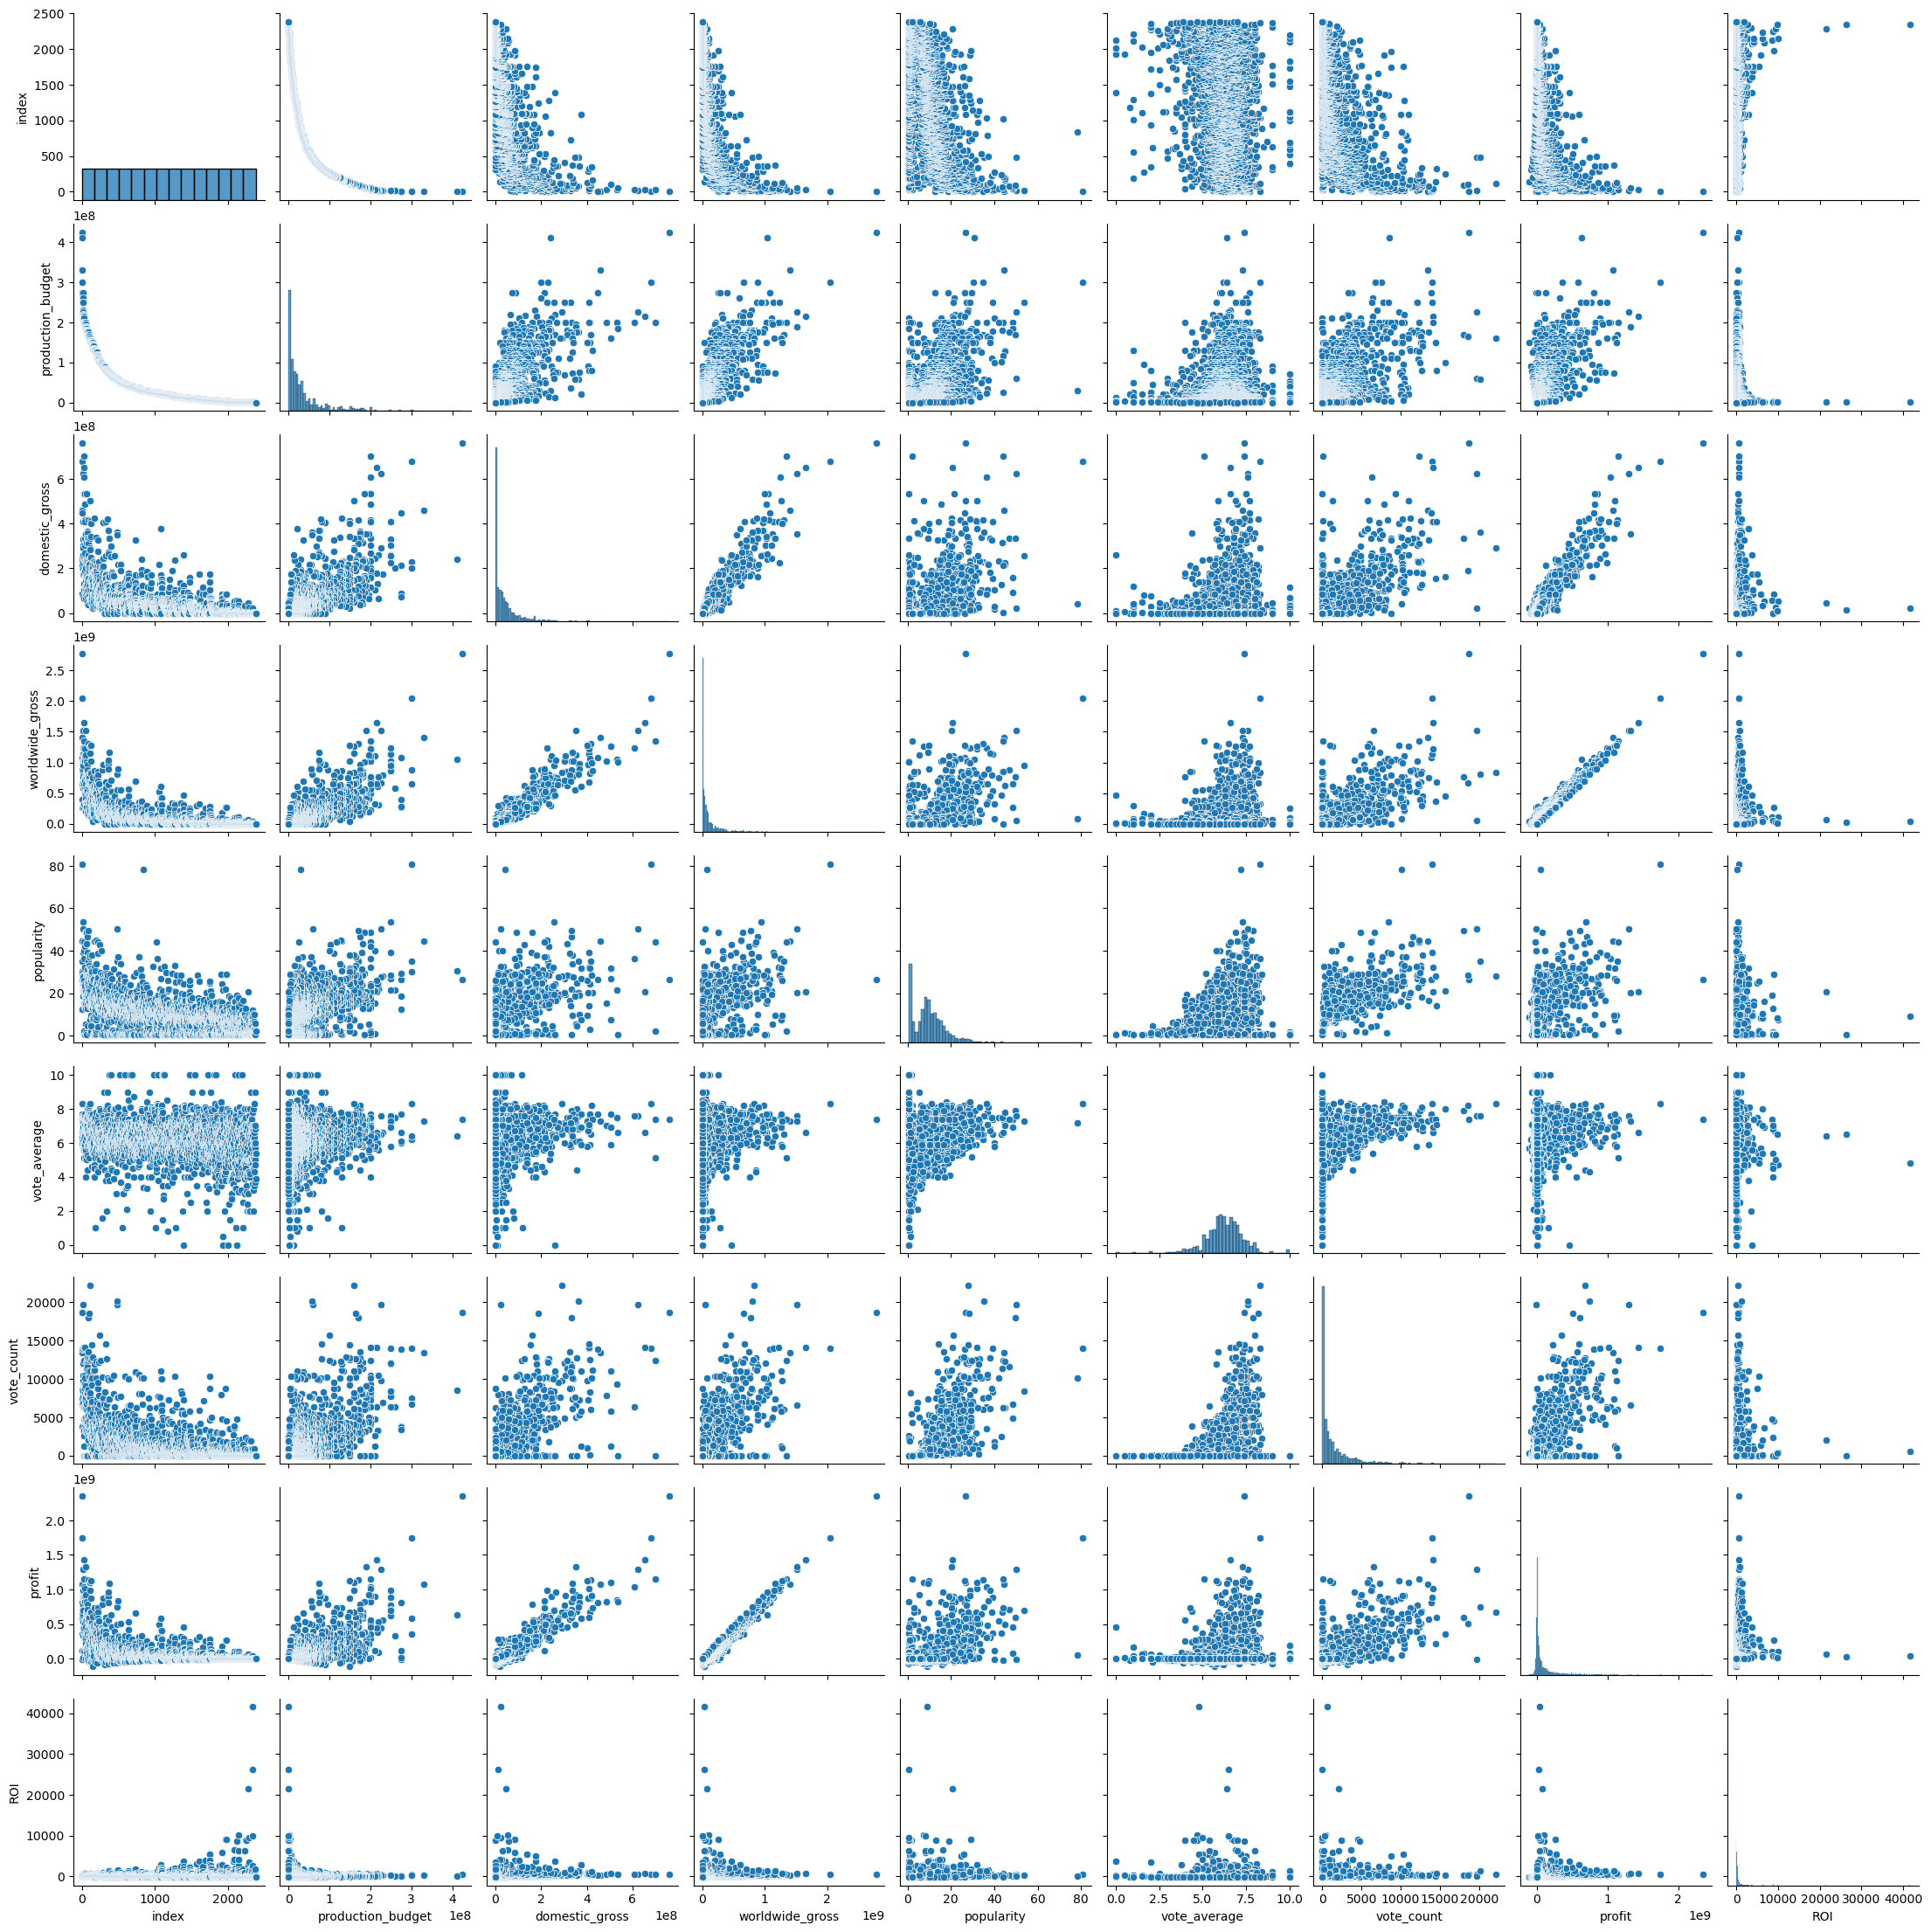

In [70]:
# check existing relationships between features

sns.pairplot(clean_movie_df);


In [71]:
import statsmodels.api as sm

In [72]:
X = clean_movie_df[['production_budget']].values
y = clean_movie_df['worldwide_gross'].values

model = sm.OLS(endog=y, exog=sm.add_constant(X))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     4068.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:01:47   Log-Likelihood:                -48024.
No. Observations:                2385   AIC:                         9.605e+04
Df Residuals:                    2383   BIC:                         9.606e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.449e+06   3.42e+06     -2.762      0.006   -1.62e+07   -2.74e+06
x1             3.4289      0.054     63.782      0.000       3.323       3.534
==============================================================================
Omnibus:                     1343.752   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25227.028
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      18.278   Cond. No.                     7.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

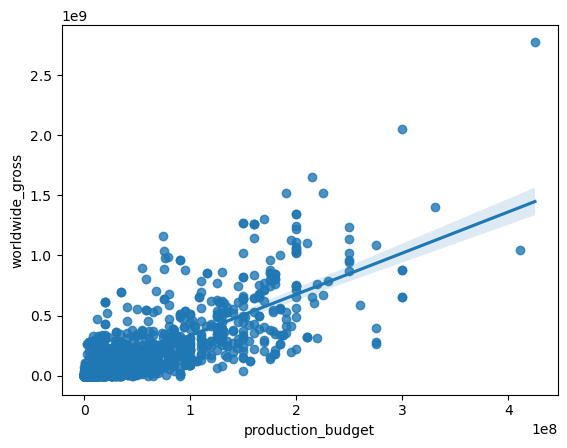

In [73]:
sns.regplot(x="production_budget", y="worldwide_gross", data=clean_movie_df);

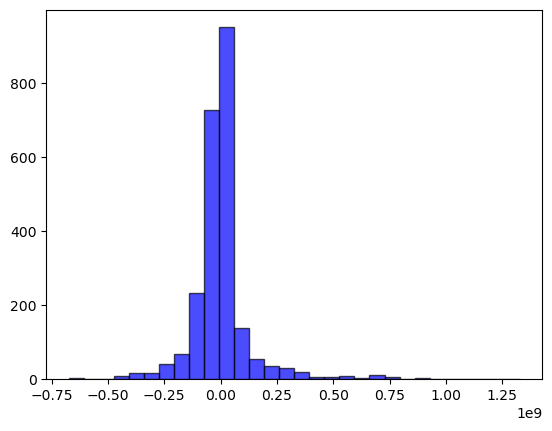

In [83]:
  # Predicted values from the model
residuals = results.resid      # Residuals from the model
plt.hist(residuals, bins=30,edgecolor='k', color='blue', alpha=0.7);